In [18]:
from fastai.vision.all import *


In [2]:
path=  untar_data(URLs.BIWI_HEAD_POSE)

In [3]:
path.ls()

(#50) [Path('/root/.fastai/data/biwi_head_pose/19.obj'),Path('/root/.fastai/data/biwi_head_pose/18'),Path('/root/.fastai/data/biwi_head_pose/20.obj'),Path('/root/.fastai/data/biwi_head_pose/04.obj'),Path('/root/.fastai/data/biwi_head_pose/16.obj'),Path('/root/.fastai/data/biwi_head_pose/07'),Path('/root/.fastai/data/biwi_head_pose/22.obj'),Path('/root/.fastai/data/biwi_head_pose/19'),Path('/root/.fastai/data/biwi_head_pose/10'),Path('/root/.fastai/data/biwi_head_pose/01.obj')...]

In [4]:
(path/'01').ls()

(#1000) [Path('/root/.fastai/data/biwi_head_pose/01/frame_00465_pose.txt'),Path('/root/.fastai/data/biwi_head_pose/01/frame_00421_pose.txt'),Path('/root/.fastai/data/biwi_head_pose/01/frame_00460_pose.txt'),Path('/root/.fastai/data/biwi_head_pose/01/frame_00257_rgb.jpg'),Path('/root/.fastai/data/biwi_head_pose/01/frame_00229_pose.txt'),Path('/root/.fastai/data/biwi_head_pose/01/frame_00496_rgb.jpg'),Path('/root/.fastai/data/biwi_head_pose/01/frame_00365_rgb.jpg'),Path('/root/.fastai/data/biwi_head_pose/01/frame_00366_rgb.jpg'),Path('/root/.fastai/data/biwi_head_pose/01/frame_00501_pose.txt'),Path('/root/.fastai/data/biwi_head_pose/01/frame_00228_pose.txt')...]

In [6]:
img_files = get_image_files(path)
def img2pose(x): return Path(f'{str(x)[:-7]}pose.txt')
img2pose(img_files[0])

Path('/root/.fastai/data/biwi_head_pose/18/frame_00257_pose.txt')

In [8]:
img= Image.open(img_files[0])
img.shape

(480, 640)

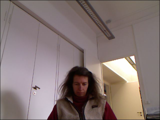

In [9]:
img.to_thumb(160)

In [10]:
cal = np.genfromtxt(path/'01'/'rgb.cal',skip_footer=6)
def get_ctr(f):
  ctr = np.genfromtxt(img2pose(f), skip_header=3)
  c1 = ctr[0] * cal[0][0] / ctr[2] + cal[0][2]
  c2 = ctr[1] * cal[1][1]/ctr[2] + cal[1][2]
  return tensor([c1,c2])

In [11]:
get_ctr(img_files[0])

tensor([338.9110, 334.7029])

In [12]:
biwi = DataBlock(
    blocks=(ImageBlock,PointBlock),
    get_items=get_image_files,
    get_y=get_ctr,
    splitter = FuncSplitter(lambda o: o.parent.name=='13'),
    batch_tfms= [*aug_transforms(size=(240,320)),
                 Normalize.from_stats(*imagenet_stats)]
)

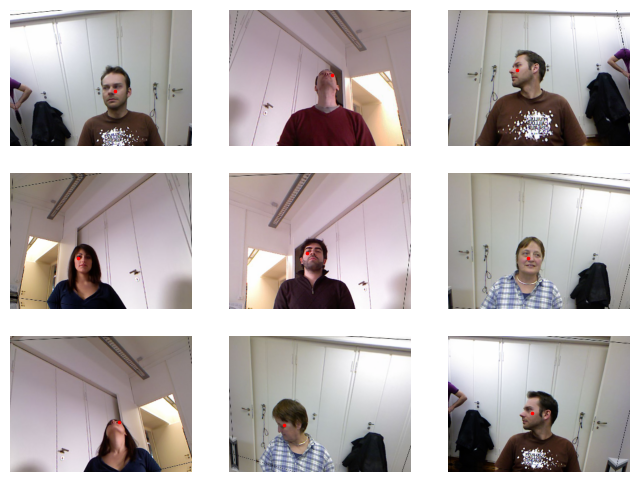

In [14]:
dls = biwi.dataloaders(path)
dls.show_batch(max_n=9,nrows=3, figsize=(8,6))

In [15]:
xb,yb = dls.one_batch()
xb.shape,yb.shape

(torch.Size([64, 3, 240, 320]), torch.Size([64, 1, 2]))

In [16]:
learn = vision_learner(dls,resnet18,y_range=(-1,1))


/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth
100%|██████████| 44.7M/44.7M [00:00<00:00, 71.1MB/s]


In [19]:
!pip install -Uqq fastbook
import fastbook

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 719.8/719.8 kB 20.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.2/7.2 MB 92.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 486.2/486.2 kB 46.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 47.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.5/110.5 kB 12.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 212.5/212.5 kB 25.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.3/134.3 kB 18.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 kB 33.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 99.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 71.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 90.5 MB/s eta 0:00:00


In [23]:
import matplotlib.pyplot as plt
from fastbook import *

In [25]:
def sigmoid_range(x,lo,hi): return torch.sigmoid(x) * (hi-lo) + lo

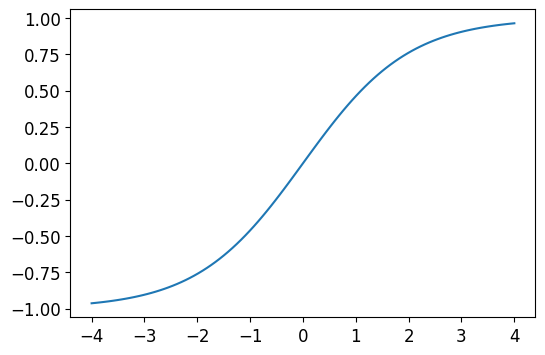

In [26]:
plot_function(partial(sigmoid_range,lo=-1,hi=1), min=-4,max=4)

In [27]:
dls.loss_func

FlattenedLoss of MSELoss()

SuggestedLRs(valley=0.0012022644514217973)

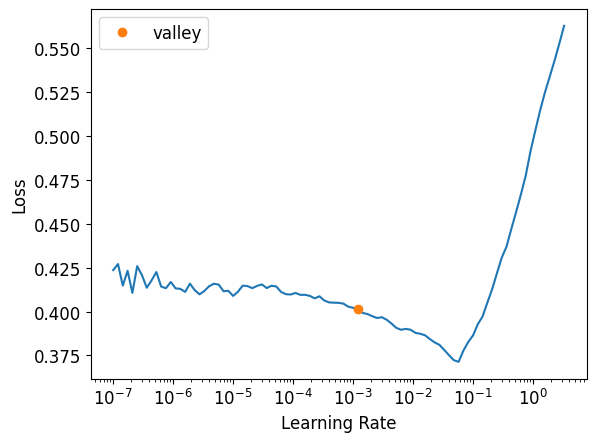

In [28]:
learn.lr_find()

In [29]:
lr = 3e-3
learn.fit_one_cycle(5,lr)

epoch,train_loss,valid_loss,time
0,0.113488,0.015864,02:15
1,0.013460,0.003217,02:15
2,0.007353,0.002510,02:14
3,0.004603,0.001734,02:15
4,0.003609,0.000872,02:27


In [30]:
lr=2e-2
learn = vision_learner(dls,resnet18,y_range=(-1,1))
learn.fit_one_cycle(5,lr)

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


epoch,train_loss,valid_loss,time
0,0.047794,0.020174,02:17
1,0.006810,0.002588,02:14
2,0.003113,0.000521,02:13
3,0.002088,0.000190,02:13
4,0.001528,0.000166,02:14


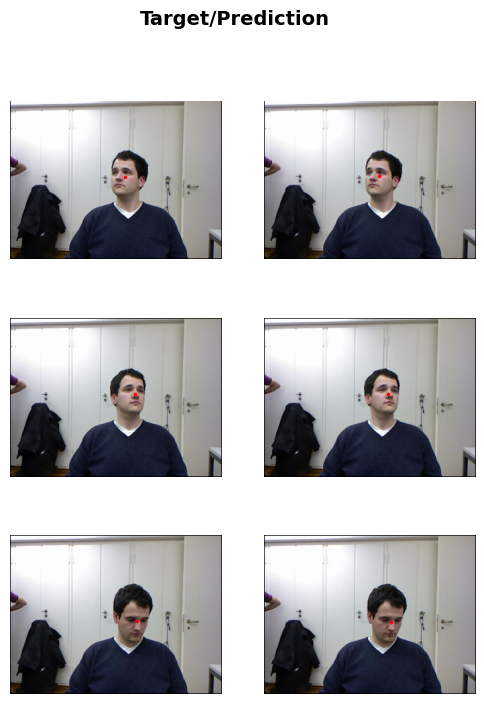

In [39]:
learn.show_results(ds_idx=1,max_n=3,figsize=(6,8))

In [41]:
learn.predict(img)

(TensorPoint([[167.4438, 167.4887]]),
 tensor([0.0465, 0.3957]),
 tensor([0.0465, 0.3957]))